In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16

In [2]:
# 問題設定
D = 3
sample_size = 10**7
mu_1_list = [i for i in range(-20, 31)]
mu_2 = 3
mu_3 = 7

def calc_estimator(data, D, kind):
    if kind == "unbiased":
        return data
    elif kind == "james_stein":
        return (1 - (D-2)/np.linalg.norm(data, ord=2, axis=1, keepdims=True)**2)*data

In [3]:
# 各推定量の平均二乗誤差を求める
res = []
for mu_1 in mu_1_list:
    mu = np.array([mu_1, mu_2, mu_3])
    cov = np.eye(D)
    data = np.random.multivariate_normal(mu, cov, size=sample_size)

    ub_est = calc_estimator(data, D, kind="unbiased")
    js_est = calc_estimator(data, D, kind="james_stein")

    ub_mse = ((ub_est-mu)**2).sum(axis=1).mean()
    js_mse = ((js_est-mu)**2).sum(axis=1).mean()
    js_mu = ((js_est-mu)**2).mean(axis=0)

    res += [{
        "mu_1": mu_1,
        "ub_mse": ub_mse,
        "js_mse": js_mse,
        "js_mu_1_mse": js_mu[0],
        "js_mu_2_mse": js_mu[1],
        "js_mu_3_mse": js_mu[2],
    }]

res_df = pd.DataFrame(res).set_index("mu_1")

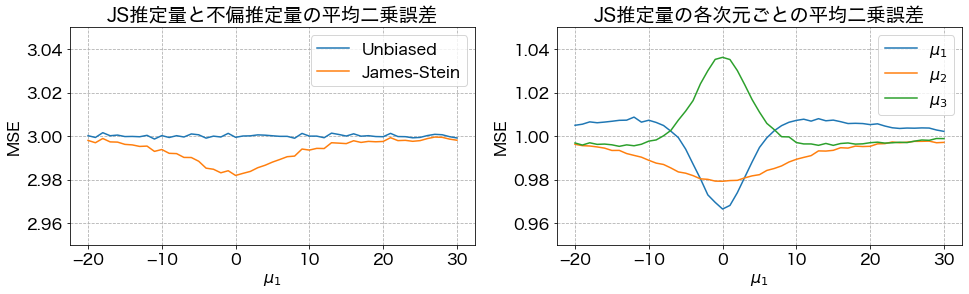

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(res_df["ub_mse"], label="Unbiased")
ax[0].plot(res_df["js_mse"], label="James-Stein")
ax[0].set_ylim(2.95, 3.05)
ax[0].grid(ls="--")
ax[0].set_title("JS推定量と不偏推定量の平均二乗誤差")
ax[0].set_xlabel("$\mu_1$")
ax[0].set_ylabel("MSE")
ax[0].legend()

for i in range(1, 4):
    ax[1].plot(res_df[f"js_mu_{i}_mse"], label=f"$\mu_{i}$")

ax[1].set_ylim(0.95, 1.05)
ax[1].grid(ls="--")
ax[1].set_title("JS推定量の各次元ごとの平均二乗誤差")
ax[1].set_xlabel("$\mu_1$")
ax[1].set_ylabel("MSE")
ax[1].legend()

plt.show()

**2つの図からわかること**
- 全体的にJS推定量の方がMSEが小さい.
- 特に, $\mu_1=0$ 付近ではその差が大きくなっている.
    - 各次元ごとに誤差が小さくなっているわけではなく, 全体として誤差を小さくしている.

この現象はJS推定量の式

$$
\hat{\boldsymbol{\theta}}_{\mathrm{JS}}(\mathbf{x}):=\left(1-\frac{D-2}{\|\mathbf{x}\|^{2}}\right) \mathbf{x}
$$

におけるL2ノルム計算部分の影響であり, データの各次元の値が小さいほど (今回の場合 $\mu_1=0$ ) 不偏推定量から離れた値を返すことがわかる.